# Model Comparison

In [21]:
import numpy as np
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tabulate import tabulate
from PIL import Image
from Model_comparison_functions import *

Set path:


In [22]:
desktop_path = os.path.expanduser("~/Desktop")
#os.chdir(desktop_path+'\DTU MSc\MSc thesis\git\lightenup')
os.chdir(desktop_path+'\Thesis')
Add_on_path = "\\Results\\Model Exploration\\"
current_directory = os.getcwd()  # Jupyter file take the current directory as where the jupyter file is located. Different than a .py file...

# FEATURE-DRIVEN MODEL EXPLORATION

# Combine different results

In [23]:

Add_on_path_list = ["GA\\","HA\\","HA\\365\\","Non_Linear\\","No forecasts\\Feature\\","Temporal\\Feature\\"]
Array = np.empty( (1, 1, 88, 5, 2,len(Add_on_path_list) ) )
for p,paths in enumerate(Add_on_path_list):

    df_Exp_profit = json_to_df(current_directory + Add_on_path + paths +  'Exp_profit.json')
    df_RT_profit  = json_to_df(current_directory + Add_on_path + paths + 'RT_profit.json')
    #print(df_Exp_profit)
    # Setup the arrays
    


    for col in df_Exp_profit.columns:
        
        # Create a four dimensional 

        # (M, D, Model)
        
        # Assign the month, the day, the model, and each of the 

        # Extract the 'm', 'd', and 't' values from column name
        parts = col.split('_')

        m = 0
        
        f = 1
        
        d = int(parts[2][3:])



        Array[(f-1),(m),(d-1),0,0,p] = df_Exp_profit[col]['rule']
        Array[(f-1),(m),(d-1),1,0,p] = df_Exp_profit[col]['det']
        Array[(f-1),(m),(d-1),2,0,p] = df_Exp_profit[col]['sto']
        Array[(f-1),(m),(d-1),3,0,p] = df_Exp_profit[col]['feature']
        #print(df_Exp_profit[col]['feature'])
        Array[(f-1),(m),(d-1),4,0,p] = df_Exp_profit[col]['oracle']
        
        Array[(f-1),(m),(d-1),0,1,p] = df_RT_profit[col]['rule']
        Array[(f-1),(m),(d-1),1,1,p] = df_RT_profit[col]['det']
        Array[(f-1),(m),(d-1),2,1,p] = df_RT_profit[col]['sto']
        Array[(f-1),(m),(d-1),3,1,p] = df_RT_profit[col]['feature']
        Array[(f-1),(m),(d-1),4,1,p] = df_RT_profit[col]['oracle']

    print(Array[(f-1),(m),24,3,1,p])
        


3400.9128227922724
3247.5874154802254
3313.561180288635
2892.613122079174
3344.691696531526
2763.8394947170978


In [24]:
print(Array[0,0,24,3,1,0])
print(Array[0,0,24,3,1,1])

3400.9128227922724
3247.5874154802254


In [25]:
print(np.shape(Array))

(1, 1, 88, 5, 2, 6)


[0, 1, 2, 3, 4, 5]


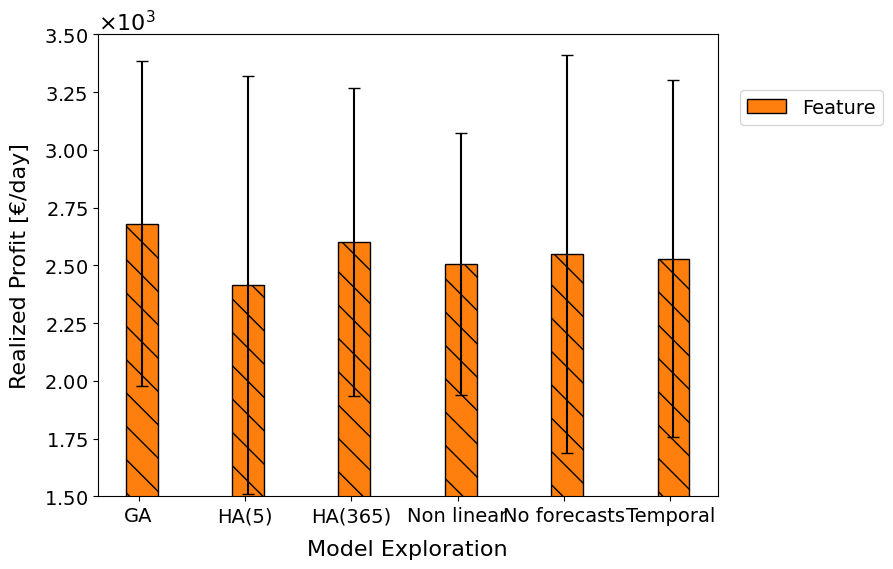

In [26]:
x_axis_tick_label = ["GA","HA(5)","HA(365)","Non linear","No forecasts","Temporal"]
x_axis_selection = [i for i in range(0,len(x_axis_tick_label))] # SampleSize[SampleSize_examination_idx] = 5
print(x_axis_selection)


plot_profit_Test(Array, PlotCase = "Model Exploration",Selected_models = ['Feature'], x_axis_label = "Model Exploration", x_axis_selection = x_axis_selection, x_axis_tick_label = x_axis_tick_label, Selected_Profit = ['Realized'], barwidth = 0.3, y_axis_label =  'Realized Profit [\u20AC/day]', ylim = [1500,3500],legends = ['Feature'],  ShowEachTestDay = False, pdf_name = 'Profit_Bar_Exploration_Feature',save=False)

# STOCHASTIC MODEL EXPLORATION

In [29]:

Add_on_path_list = ["Base\\","Temporal\\Stochastic\\","Temporal Correlation\\"]
Array = np.empty( (1, 1, 88, 5, 2,len(Add_on_path_list) ) )
for p,paths in enumerate(Add_on_path_list):

    df_Exp_profit = json_to_df(current_directory + Add_on_path + paths +  'Exp_profit.json')
    df_RT_profit  = json_to_df(current_directory + Add_on_path + paths + 'RT_profit.json')
    #print(df_Exp_profit)
    # Setup the arrays
    


    for col in df_Exp_profit.columns:
        
        # Create a four dimensional 

        # (M, D, Model)
        
        # Assign the month, the day, the model, and each of the 

        # Extract the 'm', 'd', and 't' values from column name
        parts = col.split('_')

        m = 0
        
        f = 1
        
        d = int(parts[2][3:])



        Array[(f-1),(m),(d-1),0,0,p] = df_Exp_profit[col]['rule']
        Array[(f-1),(m),(d-1),1,0,p] = df_Exp_profit[col]['det']
        Array[(f-1),(m),(d-1),2,0,p] = df_Exp_profit[col]['sto']
        Array[(f-1),(m),(d-1),3,0,p] = df_Exp_profit[col]['feature']
        #print(df_Exp_profit[col]['feature'])
        Array[(f-1),(m),(d-1),4,0,p] = df_Exp_profit[col]['oracle']
        
        Array[(f-1),(m),(d-1),0,1,p] = df_RT_profit[col]['rule']
        Array[(f-1),(m),(d-1),1,1,p] = df_RT_profit[col]['det']
        Array[(f-1),(m),(d-1),2,1,p] = df_RT_profit[col]['sto']
        Array[(f-1),(m),(d-1),3,1,p] = df_RT_profit[col]['feature']
        Array[(f-1),(m),(d-1),4,1,p] = df_RT_profit[col]['oracle']

    print(Array[(f-1),(m),24,2,1,p])
        


3497.2181516028427
3497.2124311152193
3496.364962907414


[0, 1, 2]


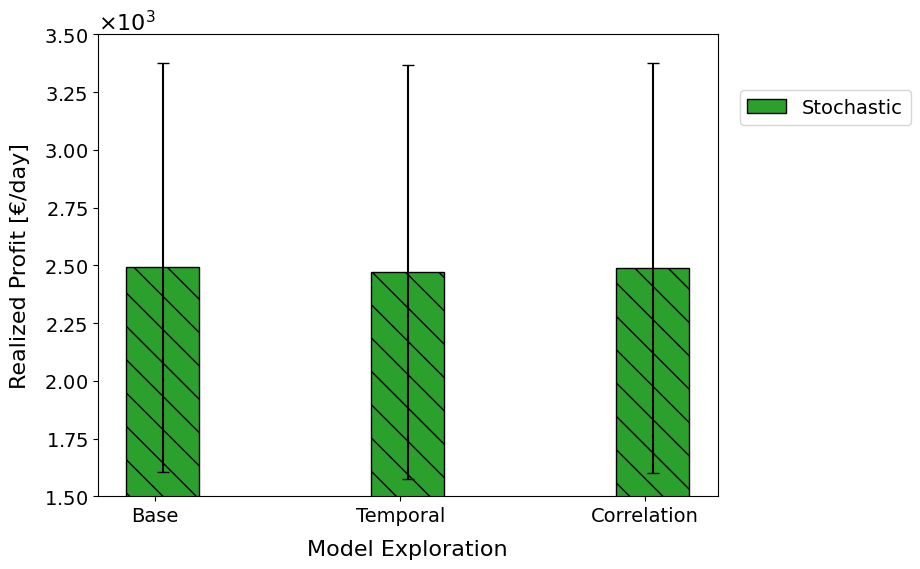

In [28]:
x_axis_tick_label = ["Base","Temporal","Correlation"]
x_axis_selection = [i for i in range(0,len(x_axis_tick_label))] # SampleSize[SampleSize_examination_idx] = 5
print(x_axis_selection)

plot_profit_Test(Array, PlotCase = "Model Exploration",Selected_models = ['Stochastic'], x_axis_label = "Model Exploration", x_axis_selection = x_axis_selection, x_axis_tick_label = x_axis_tick_label, Selected_Profit = ['Realized'], barwidth = 0.3, y_axis_label =  'Realized Profit [\u20AC/day]', ylim = [1500,3500],legends = ['Stochastic'],  ShowEachTestDay = False, pdf_name = 'Profit_Bar_Exploration_Stochastic',save=False)